# Importing Data and Resources

In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Mall_Customers.csv")
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [83]:
df.describe

<bound method NDFrame.describe of      CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [84]:
df.drop(['CustomerID'],axis = 1, inplace = True)
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


# Seperating Between Male and Female Data

In [85]:
Males = df.loc[df['Gender'] == 'Male']
Females = df.loc[df['Gender'] == 'Female']

Males

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
8,Male,64,19,3
10,Male,67,19,14
14,Male,37,20,13
...,...,...,...,...
187,Male,28,101,68
192,Male,33,113,8
197,Male,32,126,74
198,Male,32,137,18


# Bar Plot Between Age and Spending Score 

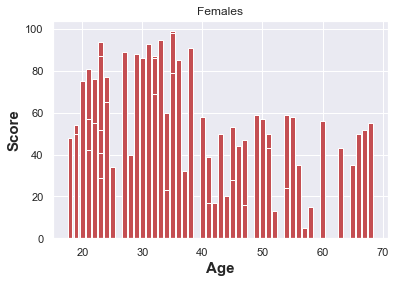

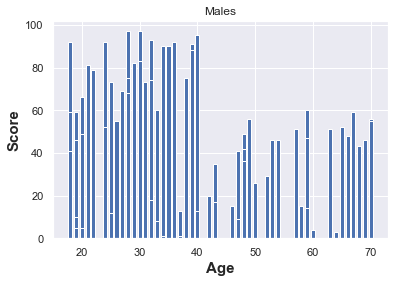

In [86]:
plt.bar(Females['Age'], Females['Spending Score (1-100)'], color ='r', width = 0.7, label ='Female Age vs Score')
plt.title("Females")
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.show()
plt.bar(Males['Age'], Males['Spending Score (1-100)'], color ='b', width = 0.7, label ='Male Age vs Score')
plt.title("Males")
plt.xlabel('Age', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.show()

These plots shows which age group of the customers spends the most

In [87]:
X = df.replace({'Gender' : { 'Male' : 1, 'Female' : 0}})


In [88]:
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# WCSS(With In Clusters Sum of Square)

In [90]:
Females.drop(['Gender','Age'], axis = 1, inplace = True)


C:\Users\DeLL\AppData\Local\Temp/ipykernel_11180/3467882373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Females.drop(['Gender','Age'], axis = 1, inplace = True)


In [91]:
Females

,Annual Income (k$),Spending Score (1-100)
2,16,6
3,16,77
4,17,40
5,17,76
6,18,6
...,...,...
191,103,69
193,113,91
194,120,16
195,120,79


In [92]:
wcssf = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 2)
    kmeans.fit(Females)
    wcssf.append(kmeans.inertia_)
wcssf   

[139654.91964285713,
 89849.89974457215,
 58798.448575777344,
 38355.70793650794,
 22123.13733609386,
 18395.568793525315,
 15147.416412572933,
 11968.886699507391,
 10299.66908091908,
 9234.639180341503]

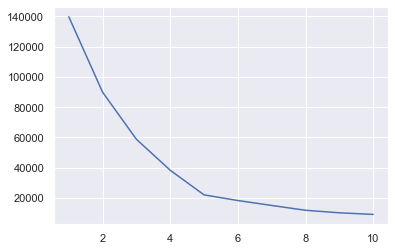

In [93]:
sns.set()
plt.plot(range(1,11), wcssf)
plt.show()


In [94]:
kmeansf = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
Y = kmeansf.fit_predict(Females)
print(Y)

[3 2 3 2 3 2 2 2 3 2 3 2 3 3 3 3 2 2 3 2 3 2 3 2 3 1 3 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 4 0 4 4 0 4 0 0 4 4 0 0 4 0 4 4 4 0 4 4 4 4 0 0 4 0 4 4 0 0 0 4 0 4 4 0 4
 0]


In [95]:
Females.shape

(112, 2)

In [96]:
Females.index

Int64Index([  2,   3,   4,   5,   6,   7,   9,  11,  12,  13,
            ...
            184, 186, 188, 189, 190, 191, 193, 194, 195, 196],
           dtype='int64', length=112)

In [97]:
Y

array([3, 2, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 2,
       3, 2, 3, 1, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 4, 0, 4, 4, 0, 4, 0, 0, 4, 4, 0, 0, 4, 0,
       4, 4, 4, 0, 4, 4, 4, 4, 0, 0, 4, 0, 4, 4, 0, 0, 0, 4, 0, 4, 4, 0,
       4, 0])

In [98]:
Females['Y'] = Y

C:\Users\DeLL\AppData\Local\Temp/ipykernel_11180/3132763156.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Females['Y'] = Y


In [99]:
income0 = Females.loc[Females['Y'] == 0]
i0 = income0.drop(['Spending Score (1-100)', 'Y'], axis = 1)

income1 = Females.loc[Females['Y'] == 1]
i1 = income1.drop(['Spending Score (1-100)', 'Y'], axis = 1)

income2 = Females.loc[Females['Y'] == 2]
i2 = income2.drop(['Spending Score (1-100)', 'Y'], axis = 1)

income3 = Females.loc[Females['Y'] == 3]
i3 = income3.drop(['Spending Score (1-100)', 'Y'], axis = 1)

income4 = Females.loc[Females['Y'] == 4]
i4 = income4.drop(['Spending Score (1-100)', 'Y'], axis = 1)


In [100]:
s0 = income0.drop(['Annual Income (k$)', 'Y'], axis = 1)
s1 = income1.drop(['Annual Income (k$)', 'Y'], axis = 1)
s2 = income2.drop(['Annual Income (k$)', 'Y'], axis = 1)
s3 = income3.drop(['Annual Income (k$)', 'Y'], axis = 1)
s4 = income4.drop(['Annual Income (k$)', 'Y'], axis = 1)

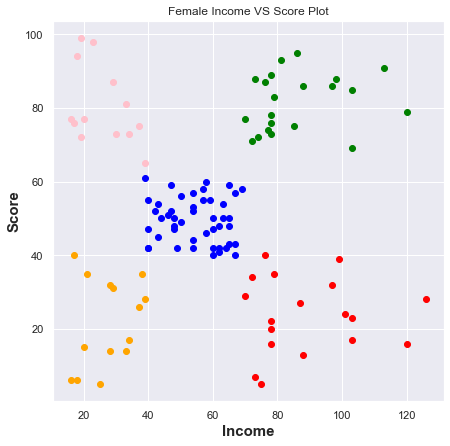

In [101]:
sns.set()
plt.figure(figsize=(7,7))
plt.title("Female Income VS Score Plot")
plt.xlabel('Income', fontweight ='bold', fontsize = 15)
plt.ylabel('Score', fontweight ='bold', fontsize = 15)
plt.scatter(i0,s0,c = 'red',label = 'Cluster1')
plt.scatter(i1,s1,c = 'blue',label = 'Cluster2')
plt.scatter(i2,s2,c = 'pink',label = 'Cluster3')
plt.scatter(i3,s3,c = 'orange',label = 'Cluster4')
plt.scatter(i4,s4,c = 'green',label = 'Cluster5')
plt.show()

The insight shows that the mall attracts the females with the income range of (40-65)K$ and 
the age group is of 20-40 years of those females